In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import thinkstats2 as ts
import thinkplot as tp
import pylab as P

%matplotlib inline

In [28]:
df = pd.read_csv('train.csv', header=0)

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


Look at the age histogram:

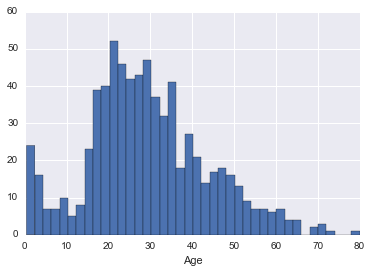

In [30]:
plt.hist(df['Age'].dropna(),40)
plt.xlabel('Age')

Look at Fare histogram:

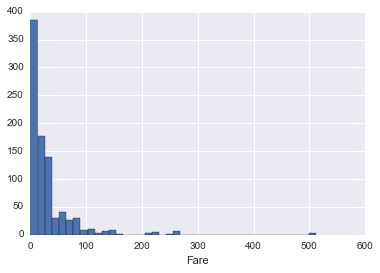

In [31]:
plt.hist(df['Fare'].dropna(),40)
plt.xlabel('Fare')

In [32]:
df.groupby('Pclass').mean()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

You were more likely to survive if you were higher class.

In [33]:
df.groupby('Sex').mean()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Females were far more likely to survive than males.

In [34]:
print 'children survival rate:',df.Survived[df.Age < 18].mean()
print '   adult survival rate:',df.Survived[df.Age >= 18].mean()

children survival rate: 0.53982300885
   adult survival rate: 0.381031613977


Children were more likely to survive than adults.

In [35]:
# Pearson's and Spearman's correlation between age and survival rate
ndf = df.dropna(subset = ['Survived', 'Age'])
print 'Pearsons:',ts.Corr(ndf.Age, ndf.Survived)
print 'Spearmans:',ts.SpearmanCorr(ndf.Age, ndf.Survived)

Pearsons: -0.0772210945722
Spearmans: -0.0525653000447


Age and Survival don't seem to be that correlated according to Pearsons and Spearmans.

In [36]:
# Survival rate based on Fare:
print '     <$10:', df.Survived[df.Fare < 10].mean()
print ' $10 - 30:', df.Survived[(df.Fare >=10) & (df.Fare < 30)].mean()
print ' $30 - 80:', df.Survived[(df.Fare >=30) & (df.Fare < 80)].mean()
print '$80 - 200:', df.Survived[(df.Fare >=80) & (df.Fare < 200)].mean()
print '    $200+:', df.Survived[(df.Fare >=200) & (df.Fare < 600)].mean()

     <$10: 0.199404761905
 $10 - 30: 0.425396825397
 $30 - 80: 0.5
$80 - 200: 0.803571428571
    $200+: 0.7


People who paid above $80 on their ticket had the best survival rate.